In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
import seaborn as sns
sns.set()

### Question 1a Implement a Linear Regression for d = 0 to 6

In [29]:
def hypothesis(x, d):
    k = 3
    n = len(x)
    theta = [0] * (2 * (d+1))
    phi = np.zeros( (n, len(theta)) )
    #print('size of phi ', phi.shape)
    phi[:,0] = 1
    phi[:,1] = x 
    for i in range(1,d+1):
        for j in range(0,len(x)):
            phi[j,2*i] = math.sin(i * k * x[j])
            phi[j,2*i+1] = math.cos(i * k * x[j])
    return phi

In [30]:
def predict(fea, theta):
    return np.dot(fea, theta)

In [31]:
def normal_equation(x, y):
    xti = np.linalg.pinv(x)
    theta = np.dot(xti, y)
    return theta

In [32]:
def loss(y, y_pred):
    lossess = np.mean((y_pred - y) ** 2)
    return lossess

### Question 1b Apply your regression learner to the data set that was generated and Plot the resulting function.

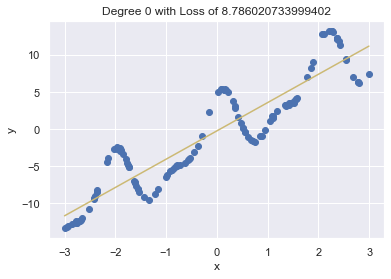

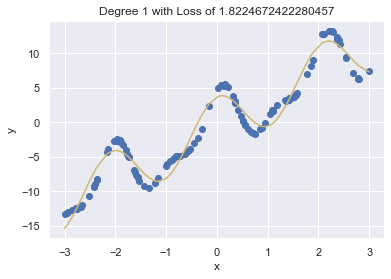

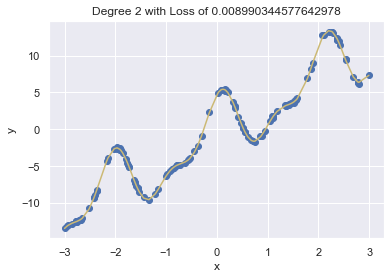

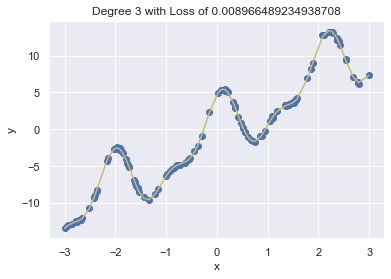

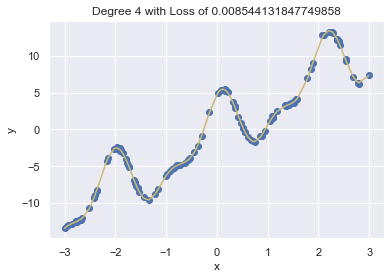

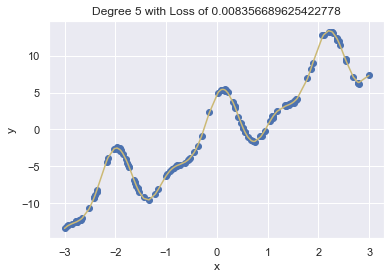

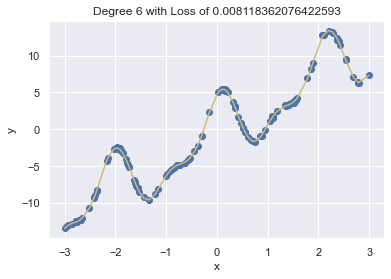

In [33]:
for i in range(7):
    train_data = pd.read_excel('trainingdata_1b.xlsx')
    x_train = train_data.iloc[:,0]
    y_train = train_data.iloc[:,1]
    x_train = x_train.values
    y_train = y_train.values
    poly_features = hypothesis(x_train, i)
    theta = normal_equation(poly_features, y_train)
    y_pred = predict(poly_features, theta)
    loss = np.mean((y_pred - y_train) ** 2)
    plt.scatter(x_train, y_train)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_train,y_pred), key=sort_axis)
    x_train, y_pred = zip(*sorted_zip)
    plt.plot(x_train, y_pred, color='y')
    plt.title(f'Degree {i} with Loss of {loss}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    

### Question 1c Evaluating regression functions by computing the error on the test data points.

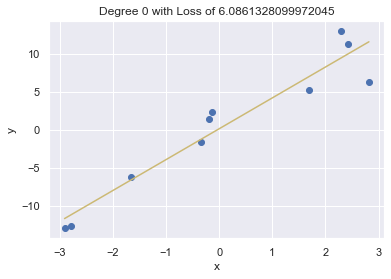

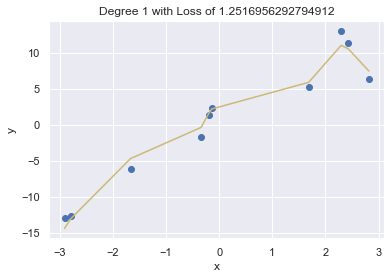

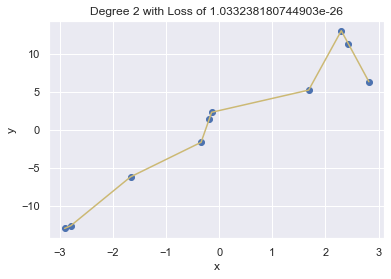

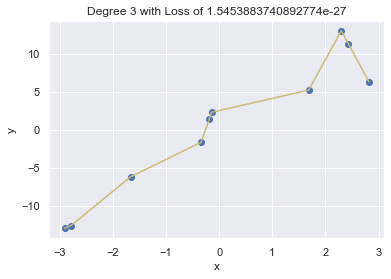

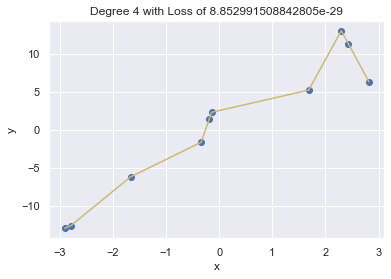

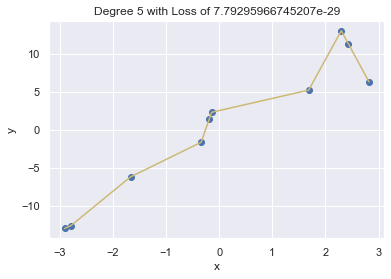

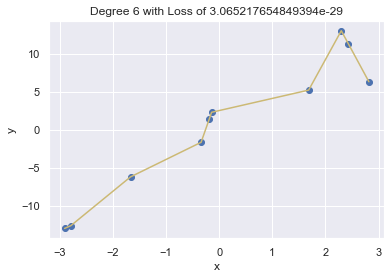

In [34]:
for i in range(7):
    test_data = pd.read_excel('testdata_1c.xlsx')
    x_test = test_data.iloc[:,0]
    y_test = test_data.iloc[:,1]
    x_test = x_test.values
    y_test = y_test.values
    poly_features = hypothesis(x_test, i)
    theta = normal_equation(poly_features, y_test)
    y_pred = predict(poly_features, theta)
    loss = np.mean((y_pred - y_test) ** 2)
    plt.scatter(x_test, y_test)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_test,y_pred), key=sort_axis)
    x_test, y_pred = zip(*sorted_zip)
    plt.plot(x_test, y_pred, color='y')
    plt.title(f'Degree {i} with Loss of {loss}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#### Function depth = 2 is the best prediction with least loss or error of approx. 1.03328 in predicting the y. The model tries to overfit for other degrees.

### Question 1d, Experimenting and evaluating part b and c using only the first 20 elements of the training data set.

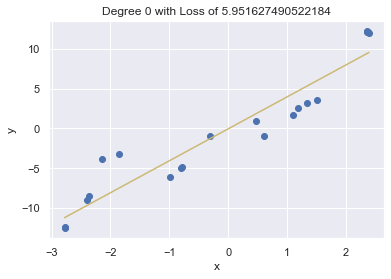

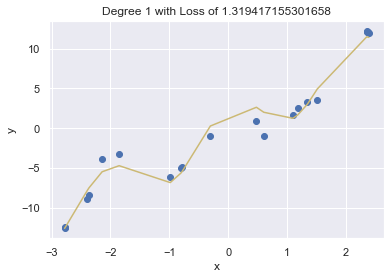

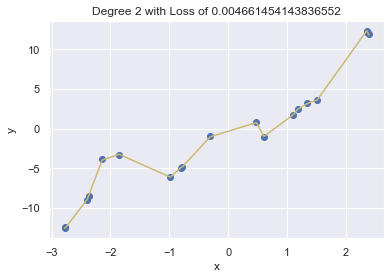

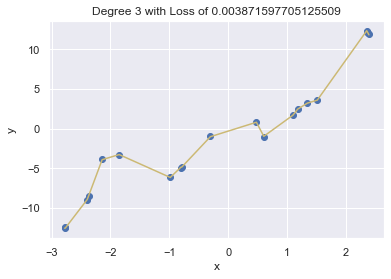

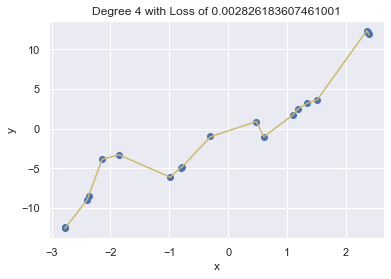

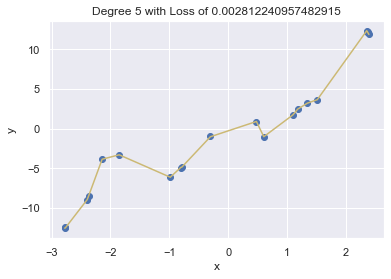

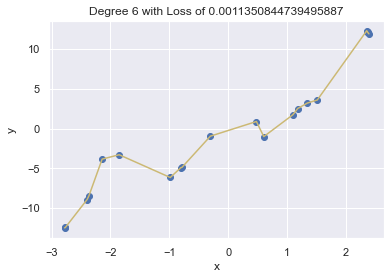

In [35]:
for i in range(7):
    train_data = pd.read_excel('trainingdata_1b.xlsx')
    x_train = train_data.iloc[:,0]
    y_train = train_data.iloc[:,1]
    x_train = x_train.values[0:20]
    y_train = y_train.values[0:20]
    poly_features = hypothesis(x_train, i)
    theta = normal_equation(poly_features, y_train)
    y_pred = predict(poly_features, theta)
    loss = np.mean((y_pred - y_train) ** 2)
    plt.scatter(x_train, y_train)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_train,y_pred), key=sort_axis)
    x_train, y_pred = zip(*sorted_zip)
    plt.plot(x_train, y_pred, color='y')
    plt.title(f'Degree {i} with Loss of {loss}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

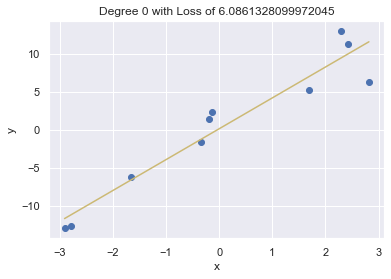

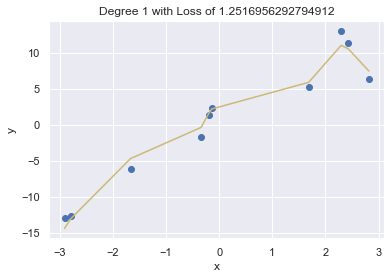

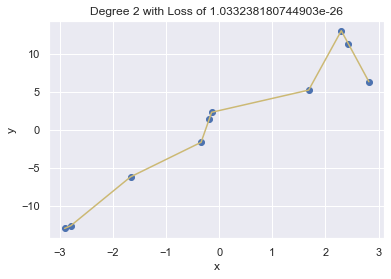

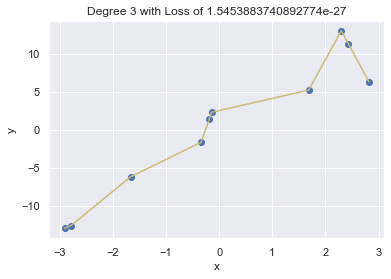

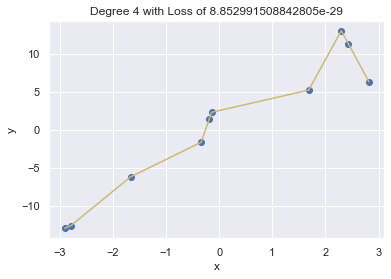

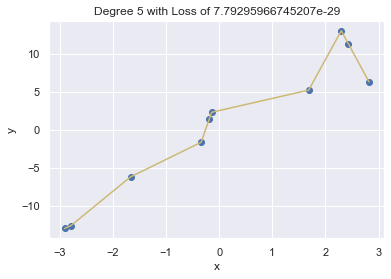

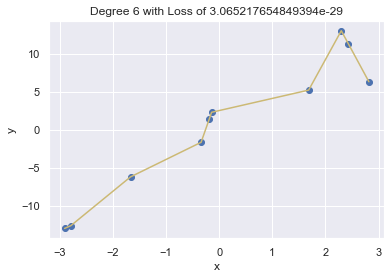

In [36]:
for i in range(7):
    test_data = pd.read_excel('testdata_1c.xlsx')
    x_test = test_data.iloc[:,0]
    y_test = test_data.iloc[:,1]
    x_test = x_test.values
    y_test = y_test.values
    poly_features = hypothesis(x_test, i)
    theta = normal_equation(poly_features, y_test)
    y_pred = predict(poly_features, theta)
    loss = np.mean((y_pred - y_test) ** 2)
    plt.scatter(x_test, y_test)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_test,y_pred), key=sort_axis)
    x_test, y_pred = zip(*sorted_zip)
    plt.plot(x_test, y_pred, color='y')
    plt.title(f'Degree {i} with Loss of {loss}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

### question 1d. The result shows the degree 2 best fit the data. 
we have very less data which could potentially lead to overfitting.
